# Text Classification using GradientBoostingClassifier and CountVectorizer

This Code Template is for Text Classification using GradientBoostingClassifier based on the Gradient Boosting Ensemble Learning Technique along with Text Feature technique CountVectorizer from Scikit-learn in python. Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.

### Required Packages

In [ ]:
!pip install nltk
!pip install imblearn

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as se
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import SnowballStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to C:\Users\AKSHAR
[nltk_data]     NERKAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\AKSHAR
[nltk_data]     NERKAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AKSHAR NERKAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to C:\Users\AKSHAR
[nltk_data]     NERKAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

**Target** variable for prediction.

In [3]:
target=''

Text column containing all the text data


In [4]:
text=""

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing

The text data might contain noise in various forms like emotions, punctuation, text in a different case etc. We apply various text preprocessing methods such as converting text to lowercase, remove text in square brackets, remove links, remove special characters and remove words containing numbers to clean the text data and make it ready to feed data to the model.

We also apply lemmetization technique to the data which groups together the different canonical forms of a word so they can be analysed as a single item which ultimately improves model accuracy.

In [6]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def textfinalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

def data_preprocess(df, target):
    df = df.dropna(axis=0, how = 'any')
    df[target] = LabelEncoder().fit_transform(df[target])    
    return df

In [7]:
df = data_preprocess(df, target)
df[text] = df[text].apply(lambda x: textfinalpreprocess(x))
df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [8]:
X=df[text]
Y=df[target]

#### Distribution Of Target Variable

<AxesSubplot:xlabel='Category', ylabel='count'>

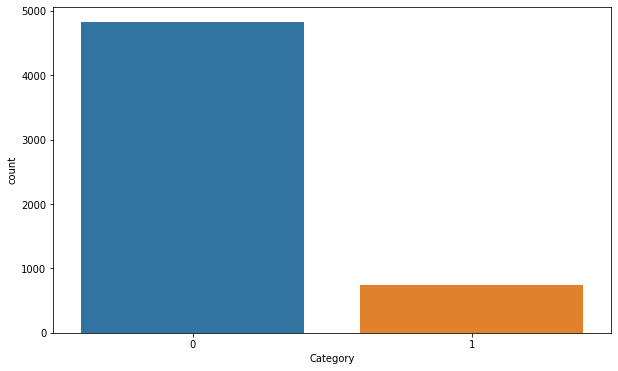

In [9]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting
Since we are using a univariate dataset, we can directly split our data into training and testing subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Feature Transformation

**CountVectorizer** is a text transformation technique provided by the scikit-learn library that transforms a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

It converts a collection of text documents to a matrix of token counts

***For more information on CountVectorizer [click here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)***

In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

#### Handling Target Imbalance
The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [12]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

### Model

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. 

 #### Model Tuning Parameters

    1. loss : {â€˜devianceâ€™, â€˜exponentialâ€™}, default=â€™devianceâ€™
> The loss function to be optimized. â€˜devianceâ€™ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss â€˜exponentialâ€™ gradient boosting recovers the AdaBoost algorithm.

    2. learning_ratefloat, default=0.1
> Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

    3. n_estimators : int, default=100
> The number of trees in the forest.

    4. criterion : {â€˜friedman_mseâ€™, â€˜mseâ€™, â€˜maeâ€™}, default=â€™friedman_mseâ€™
> The function to measure the quality of a split. Supported criteria are â€˜friedman_mseâ€™ for the mean squared error with improvement score by Friedman, â€˜mseâ€™ for mean squared error, and â€˜maeâ€™ for the mean absolute error. The default value of â€˜friedman_mseâ€™ is generally the best as it can provide a better approximation in some cases.

    5. max_depth : int, default=3
> The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

    6. max_features : {â€˜autoâ€™, â€˜sqrtâ€™, â€˜log2â€™}, int or float, default=None
> The number of features to consider when looking for the best split:  

    7. random_state : int, RandomState instance or None, default=None
> Controls both the randomness of the bootstrapping of the samples used when building trees (if <code>bootstrap=True</code>) and the sampling of the features to consider when looking for the best split at each node (if `max_features < n_features`).

    8. verbose : int, default=0
> Controls the verbosity when fitting and predicting.
    
    9. n_iter_no_change : int, default=None
> <code>n_iter_no_change</code> is used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside <code>validation_fraction</code> size of the training data as validation and terminate training when validation score is not improving in all of the previous <code>n_iter_no_change</code> numbers of iterations. The split is stratified.
    
    10. tol : float, default=1e-4
> Tolerance for the early stopping. When the loss is not improving by at least tol for <code>n_iter_no_change</code> iterations (if set to a number), the training stops.

In [13]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [14]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 94.53 %



#### Confusion Matrix
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

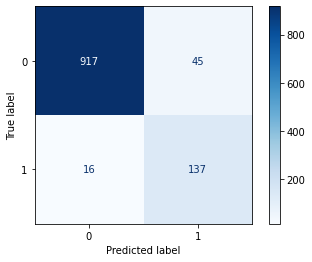

In [15]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.
* where:
  - Precision:- Accuracy of positive predictions.
  -  Recall:- Fraction of positives that were correctly identified.
  -  f1-score:- percent of positive predictions were correct
  -  support:- Support is the number of actual occurrences of the class in the specified dataset.

In [16]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       962
           1       0.75      0.90      0.82       153

    accuracy                           0.95      1115
   macro avg       0.87      0.92      0.89      1115
weighted avg       0.95      0.95      0.95      1115



#### Creator: Akshar Nerkar , Github: [Profile](https://github.com/Akshar777)